In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,association_rules

In [48]:
df  = pd.read_csv('Groceries_dataset.csv')
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [50]:
df['Member_number'].value_counts()

Member_number
3180    36
3737    33
3050    33
2051    33
2625    31
        ..
2503     2
3301     2
1775     2
3723     2
2417     2
Name: count, Length: 3898, dtype: int64

In [51]:
df[df['Member_number'] == 3180]

,Member_number,Date,itemDescription
421,3180,15-03-2015,whole milk
1810,3180,04-05-2015,tropical fruit
2054,3180,06-02-2015,ham
4041,3180,19-10-2015,root vegetables
4482,3180,15-09-2015,bottled beer
5052,3180,19-10-2015,pastry
5467,3180,03-07-2015,sausage
7684,3180,03-07-2015,other vegetables
8034,3180,15-09-2015,tropical fruit
10056,3180,24-02-2014,citrus fruit


In [52]:
cnt = df.groupby('itemDescription').count()['Member_number'].sort_values(ascending=False)
cnt

itemDescription
whole milk               2502
other vegetables         1898
rolls/buns               1716
soda                     1514
yogurt                   1334
                         ... 
rubbing alcohol             5
bags                        4
baby cosmetics              3
preservation products       1
kitchen utensil             1
Name: Member_number, Length: 167, dtype: int64

In [53]:
df_cnt = cnt.reset_index()
df_cnt1= df_cnt[:10]
df_cnt1

,itemDescription,Member_number
0,whole milk,2502
1,other vegetables,1898
2,rolls/buns,1716
3,soda,1514
4,yogurt,1334
5,root vegetables,1071
6,tropical fruit,1032
7,bottled water,933
8,sausage,924
9,citrus fruit,812


In [54]:
df_cnt.shape

(167, 2)

Text(0.5, 0, 'items')

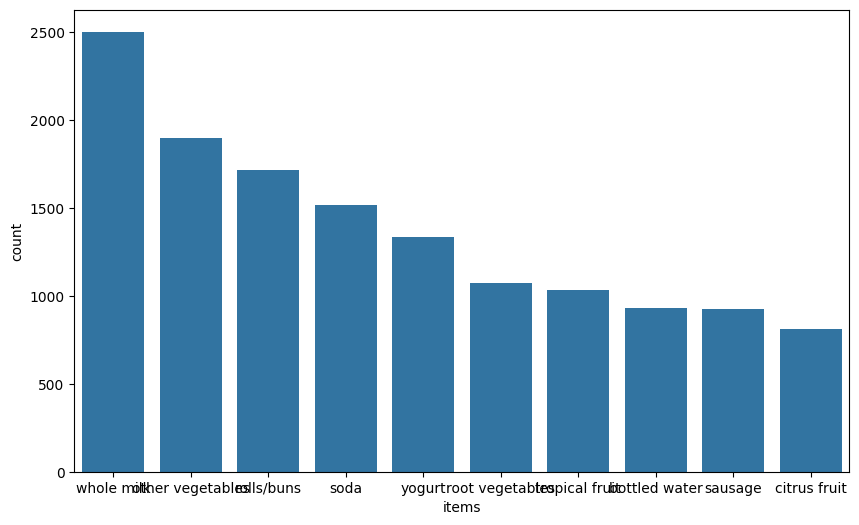

In [55]:
plt.figure(figsize=(10,6))
sns.barplot(x=df_cnt1['itemDescription'],y=df_cnt1['Member_number'],data=df_cnt1)
plt.ylabel('count')
plt.xlabel('items')

In [56]:

def func(x):
    list = []
    list.append(x)
    return list
tmp = df['itemDescription'].apply(func)
tmp

0               [tropical fruit]
1                   [whole milk]
2                    [pip fruit]
3             [other vegetables]
4                   [whole milk]
                  ...           
38760            [sliced cheese]
38761                    [candy]
38762                 [cake bar]
38763    [fruit/vegetable juice]
38764                 [cat food]
Name: itemDescription, Length: 38765, dtype: object

In [57]:
df['itemDescription'] = tmp
df

,Member_number,Date,itemDescription
0,1808,21-07-2015,[tropical fruit]
1,2552,05-01-2015,[whole milk]
2,2300,19-09-2015,[pip fruit]
3,1187,12-12-2015,[other vegetables]
4,3037,01-02-2015,[whole milk]
...,...,...,...
38760,4471,08-10-2014,[sliced cheese]
38761,2022,23-02-2014,[candy]
38762,1097,16-04-2014,[cake bar]
38763,1510,03-12-2014,[fruit/vegetable juice]


In [58]:
df[df['Member_number'] == 1000]

,Member_number,Date,itemDescription
1629,1000,27-05-2015,[soda]
2047,1000,24-07-2015,[canned beer]
4843,1000,15-03-2015,[sausage]
6388,1000,25-11-2015,[sausage]
8395,1000,15-03-2015,[whole milk]
13331,1000,24-06-2014,[whole milk]
17778,1000,27-05-2015,[pickled vegetables]
18196,1000,24-07-2015,[misc. beverages]
20992,1000,15-03-2015,[semi-finished bread]
22537,1000,25-11-2015,[hygiene articles]


In [59]:
ser = df.groupby(['Member_number','Date']).sum()['itemDescription'].reset_index(drop=True)
ser

0        [sausage, whole milk, semi-finished bread, yog...
1                        [whole milk, pastry, salty snack]
2                           [canned beer, misc. beverages]
3                              [sausage, hygiene articles]
4                               [soda, pickled vegetables]
                               ...                        
14958    [tropical fruit, berries, other vegetables, yo...
14959                               [bottled water, herbs]
14960                      [fruit/vegetable juice, onions]
14961         [soda, root vegetables, semi-finished bread]
14962                     [bottled beer, other vegetables]
Name: itemDescription, Length: 14963, dtype: object

In [60]:
df = pd.DataFrame(ser)

In [61]:
df.shape

(14963, 1)

In [62]:
transactions = df['itemDescription'].tolist()
transactions

[['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['whole milk', 'pastry', 'salty snack'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['soda', 'pickled vegetables'],
 ['frankfurter', 'curd'],
 ['sausage', 'whole milk', 'rolls/buns'],
 ['whole milk', 'soda'],
 ['beef', 'white bread'],
 ['frankfurter', 'soda', 'whipped/sour cream'],
 ['frozen vegetables', 'other vegetables'],
 ['butter', 'whole milk'],
 ['tropical fruit', 'sugar'],
 ['butter milk', 'specialty chocolate'],
 ['sausage', 'rolls/buns'],
 ['root vegetables', 'detergent'],
 ['frozen meals', 'dental care'],
 ['rolls/buns', 'rolls/buns'],
 ['dish cleaner', 'cling film/bags'],
 ['canned beer', 'frozen fish'],
 ['other vegetables', 'hygiene articles'],
 ['pip fruit', 'whole milk', 'tropical fruit'],
 ['rolls/buns', 'red/blush wine', 'chocolate'],
 ['other vegetables', 'shopping bags'],
 ['whole milk', 'chocolate', 'packaged fruit/vegetables', 'rolls/buns'],
 ['root vegetables', 'whole milk'

In [63]:
encoder = TransactionEncoder()
encoder.fit(transactions)
tmp1 = encoder.transform(transactions)
transformed_df = pd.DataFrame(tmp1,columns = encoder.columns_)


In [64]:
encoder.columns_

['Instant food products',
 'UHT-milk',
 'abrasive cleaner',
 'artif. sweetener',
 'baby cosmetics',
 'bags',
 'baking powder',
 'bathroom cleaner',
 'beef',
 'berries',
 'beverages',
 'bottled beer',
 'bottled water',
 'brandy',
 'brown bread',
 'butter',
 'butter milk',
 'cake bar',
 'candles',
 'candy',
 'canned beer',
 'canned fish',
 'canned fruit',
 'canned vegetables',
 'cat food',
 'cereals',
 'chewing gum',
 'chicken',
 'chocolate',
 'chocolate marshmallow',
 'citrus fruit',
 'cleaner',
 'cling film/bags',
 'cocoa drinks',
 'coffee',
 'condensed milk',
 'cooking chocolate',
 'cookware',
 'cream',
 'cream cheese ',
 'curd',
 'curd cheese',
 'decalcifier',
 'dental care',
 'dessert',
 'detergent',
 'dish cleaner',
 'dishes',
 'dog food',
 'domestic eggs',
 'female sanitary products',
 'finished products',
 'fish',
 'flour',
 'flower (seeds)',
 'flower soil/fertilizer',
 'frankfurter',
 'frozen chicken',
 'frozen dessert',
 'frozen fish',
 'frozen fruits',
 'frozen meals',
 'froze

In [65]:
transformed_df

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14958,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
14959,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14960,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14961,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [66]:
freq_itemset = apriori(transformed_df,min_support=6/transformed_df.shape[0],use_colnames=True)
freq_itemset

,support,itemsets
0,0.004010,(Instant food products)
1,0.021386,(UHT-milk)
2,0.001470,(abrasive cleaner)
3,0.001938,(artif. sweetener)
4,0.008087,(baking powder)
...,...,...
1966,0.000601,"(soda, shopping bags, whole milk)"
1967,0.000535,"(yogurt, shopping bags, whole milk)"
1968,0.000668,"(soda, tropical fruit, whole milk)"
1969,0.000936,"(yogurt, soda, whole milk)"


In [69]:
rules = association_rules(freq_itemset,metric='lift',min_threshold=1.5)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(butter milk),(UHT-milk),0.017577,0.021386,0.000601,0.034221,1.600131,0.000226,1.013289,0.381761
1,(UHT-milk),(butter milk),0.021386,0.017577,0.000601,0.028125,1.600131,0.000226,1.010854,0.383247
2,(UHT-milk),(cream cheese ),0.021386,0.023658,0.000869,0.040625,1.717152,0.000363,1.017685,0.426767
3,(cream cheese ),(UHT-milk),0.023658,0.021386,0.000869,0.036723,1.717152,0.000363,1.015922,0.427761
4,(artif. sweetener),(soda),0.001938,0.097106,0.000468,0.241379,2.485725,0.000280,1.190178,0.598864
...,...,...,...,...,...,...,...,...,...,...
517,"(sausage, whole milk)",(yogurt),0.008955,0.085879,0.001470,0.164179,1.911760,0.000701,1.093681,0.481231
518,"(yogurt, whole milk)",(sausage),0.011161,0.060349,0.001470,0.131737,2.182917,0.000797,1.082219,0.548014
519,(sausage),"(yogurt, whole milk)",0.060349,0.011161,0.001470,0.024363,2.182917,0.000797,1.013532,0.576701
520,(yogurt),"(sausage, whole milk)",0.085879,0.008955,0.001470,0.017121,1.911760,0.000701,1.008307,0.521727


In [72]:
rules = rules.sort_values('lift',ascending=False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
260,"(yogurt, soda)",(chewing gum),0.005814,0.012030,0.000401,0.068966,5.732950,0.000331,1.061153,0.830398
261,(chewing gum),"(yogurt, soda)",0.012030,0.005814,0.000401,0.033333,5.732950,0.000331,1.028468,0.835622
247,"(hygiene articles, whole milk)",(canned beer),0.001738,0.046916,0.000401,0.230769,4.918803,0.000319,1.239010,0.798085
250,(canned beer),"(hygiene articles, whole milk)",0.046916,0.001738,0.000401,0.008547,4.918803,0.000319,1.006868,0.835916
248,"(canned beer, whole milk)",(hygiene articles),0.006015,0.013700,0.000401,0.066667,4.866016,0.000319,1.056750,0.799301
...,...,...,...,...,...,...,...,...,...,...
43,(candles),(sausage),0.004411,0.060349,0.000401,0.090909,1.506393,0.000135,1.033616,0.337652
412,"(other vegetables, whole milk)",(white bread),0.014837,0.023993,0.000535,0.036036,1.501970,0.000179,1.012494,0.339241
413,(white bread),"(other vegetables, whole milk)",0.023993,0.014837,0.000535,0.022284,1.501970,0.000179,1.007617,0.342423
414,"(rolls/buns, pastry)",(tropical fruit),0.003943,0.067767,0.000401,0.101695,1.500652,0.000134,1.037769,0.334944


In [96]:
top_rules = rules.iloc[0:10,:]
top_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
260,"(yogurt, soda)",(chewing gum),0.005814,0.012030,0.000401,0.068966,5.732950,0.000331,1.061153,0.830398
261,(chewing gum),"(yogurt, soda)",0.012030,0.005814,0.000401,0.033333,5.732950,0.000331,1.028468,0.835622
247,"(hygiene articles, whole milk)",(canned beer),0.001738,0.046916,0.000401,0.230769,4.918803,0.000319,1.239010,0.798085
250,(canned beer),"(hygiene articles, whole milk)",0.046916,0.001738,0.000401,0.008547,4.918803,0.000319,1.006868,0.835916
248,"(canned beer, whole milk)",(hygiene articles),0.006015,0.013700,0.000401,0.066667,4.866016,0.000319,1.056750,0.799301
249,(hygiene articles),"(canned beer, whole milk)",0.013700,0.006015,0.000401,0.029268,4.866016,0.000319,1.023955,0.805529
229,"(sausage, brown bread)",(canned beer),0.001804,0.046916,0.000401,0.222222,4.736626,0.000316,1.225394,0.790305
232,(canned beer),"(sausage, brown bread)",0.046916,0.001804,0.000401,0.008547,4.736626,0.000316,1.006801,0.827712
262,(yogurt),"(chewing gum, soda)",0.085879,0.001002,0.000401,0.004669,4.657743,0.000315,1.003684,0.859080
259,"(chewing gum, soda)",(yogurt),0.001002,0.085879,0.000401,0.400000,4.657743,0.000315,1.523536,0.786092


In [99]:
def concat(row):
    return "{} -> {}".format(list(row['antecedents']), list(row['consequents']))
top_rules['new_col'] = top_rules.apply(concat,axis=1)
top_rules

/tmp/ipykernel_3687/2768329060.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_rules['new_col'] = top_rules.apply(concat,axis=1)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,new_col
260,"(yogurt, soda)",(chewing gum),0.005814,0.012030,0.000401,0.068966,5.732950,0.000331,1.061153,0.830398,"['yogurt', 'soda'] -> ['chewing gum']"
261,(chewing gum),"(yogurt, soda)",0.012030,0.005814,0.000401,0.033333,5.732950,0.000331,1.028468,0.835622,"['chewing gum'] -> ['yogurt', 'soda']"
247,"(hygiene articles, whole milk)",(canned beer),0.001738,0.046916,0.000401,0.230769,4.918803,0.000319,1.239010,0.798085,"['hygiene articles', 'whole milk'] -> ['canned..."
250,(canned beer),"(hygiene articles, whole milk)",0.046916,0.001738,0.000401,0.008547,4.918803,0.000319,1.006868,0.835916,"['canned beer'] -> ['hygiene articles', 'whole..."
248,"(canned beer, whole milk)",(hygiene articles),0.006015,0.013700,0.000401,0.066667,4.866016,0.000319,1.056750,0.799301,"['canned beer', 'whole milk'] -> ['hygiene art..."
249,(hygiene articles),"(canned beer, whole milk)",0.013700,0.006015,0.000401,0.029268,4.866016,0.000319,1.023955,0.805529,"['hygiene articles'] -> ['canned beer', 'whole..."
229,"(sausage, brown bread)",(canned beer),0.001804,0.046916,0.000401,0.222222,4.736626,0.000316,1.225394,0.790305,"['sausage', 'brown bread'] -> ['canned beer']"
232,(canned beer),"(sausage, brown bread)",0.046916,0.001804,0.000401,0.008547,4.736626,0.000316,1.006801,0.827712,"['canned beer'] -> ['sausage', 'brown bread']"
262,(yogurt),"(chewing gum, soda)",0.085879,0.001002,0.000401,0.004669,4.657743,0.000315,1.003684,0.859080,"['yogurt'] -> ['chewing gum', 'soda']"
259,"(chewing gum, soda)",(yogurt),0.001002,0.085879,0.000401,0.400000,4.657743,0.000315,1.523536,0.786092,"['chewing gum', 'soda'] -> ['yogurt']"


<Axes: xlabel='lift', ylabel='new_col'>

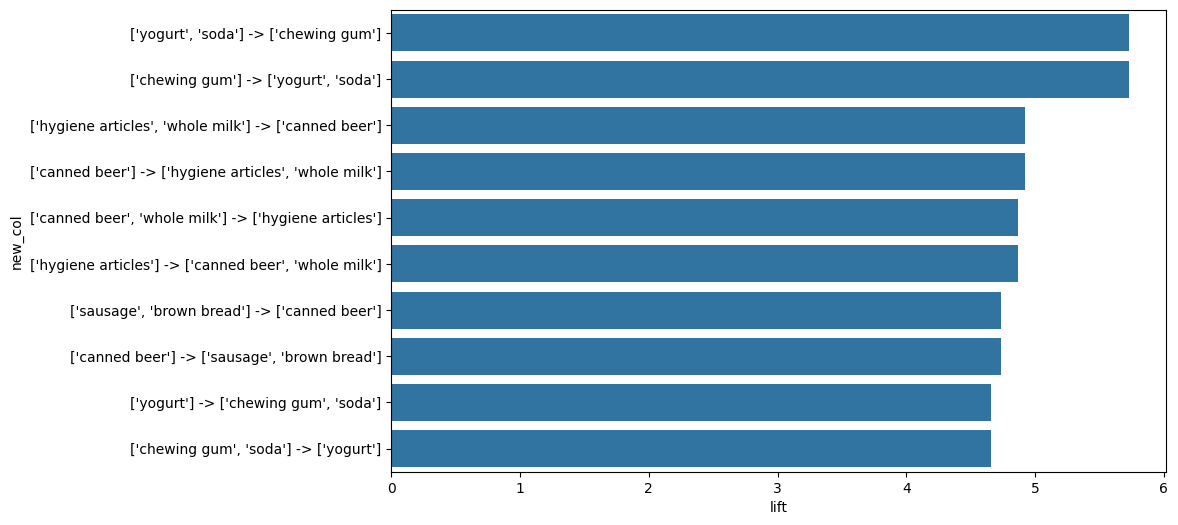

In [100]:
plt.figure(figsize=(10,6))
sns.barplot(y=top_rules['new_col'],x=top_rules['lift'],data = top_rules)